# load python package 

In [2]:
import pandas as pd 

In [3]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
import numpy as np 
import math 
import xgboost as xgb 
import toad

In [5]:
#load data 

In [6]:
data_all = pd.read_csv("scorecard.txt")

In [7]:
ex_lis = ['uid','samp_type','bad_ind']

In [8]:
ft_lis = list(data_all.columns)

In [9]:
for i in ex_lis:
    ft_lis.remove(i)

In [10]:
dev = data_all[(data_all['samp_type'])=='dev']
val = data_all[(data_all['samp_type'])=='val']
off = data_all[(data_all['samp_type'])=='off']

# EDA

In [12]:
toad.detector.detect(data_all)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
bad_ind,float64,95806,0.00%,2,0.018767,0.135702,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
uid,object,95806,0.00%,95806,A7834613:0.00%,A195702:0.00%,A2939154:0.00%,A7675771:0.00%,A3018825:0.00%,A7652738:0.00%,A7965999:0.00%,A2902450:0.00%,A10059806:0.00%,A14542947:0.00%
td_score,float64,95806,0.00%,95806,0.499739,0.288349,0.000005,0.009613,0.099706,0.500719,0.747984,0.900024,0.990041,0.999999
jxl_score,float64,95806,0.00%,95806,0.499338,0.28885,0.000013,0.009947,0.099103,0.499795,0.748646,0.899703,0.989348,0.999985
mj_score,float64,95806,0.00%,95806,0.50164,0.288679,0.000007,0.010508,0.100882,0.503048,0.752032,0.899308,0.990047,0.999993
rh_score,float64,95806,0.00%,95806,0.498407,0.287797,0.000005,0.009916,0.099948,0.497466,0.747188,0.899286,0.989473,0.999986
zzc_score,float64,95806,0.00%,95806,0.500627,0.289067,0.000012,0.010186,0.099011,0.501688,0.750986,0.899924,0.990043,0.999998
zcx_score,float64,95806,0.00%,95806,0.499672,0.289137,0.00001,0.010325,0.099743,0.49913,0.750683,0.901942,0.989712,0.999987
person_info,float64,95806,0.00%,7,-0.078229,0.156859,-0.322581,-0.322581,-0.322581,-0.053718,0.078853,0.078853,0.078853,0.078853
finance_info,float64,95806,0.00%,35,0.036763,0.039687,0.02381,0.02381,0.02381,0.02381,0.02381,0.071429,0.214286,1.02381


In [13]:
data_all.describe()

,bad_ind,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
count,95806.000000,95806.000000,95806.000000,95806.000000,95806.000000,95806.000000,95806.000000,95806.000000,95806.000000,95806.000000,95806.000000
mean,0.018767,0.499739,0.499338,0.501640,0.498407,0.500627,0.499672,-0.078229,0.036763,0.063626,0.236197
std,0.135702,0.288349,0.288850,0.288679,0.287797,0.289067,0.289137,0.156859,0.039687,0.143098,0.157132
min,0.000000,0.000005,0.000013,0.000007,0.000005,0.000012,0.000010,-0.322581,0.023810,0.000000,0.076923
25%,0.000000,0.250104,0.249045,0.250517,0.250115,0.249501,0.248318,-0.261014,0.023810,0.000000,0.076923
50%,0.000000,0.500719,0.499795,0.503048,0.497466,0.501688,0.499130,-0.053718,0.023810,0.000000,0.205128
75%,0.000000,0.747984,0.748646,0.752032,0.747188,0.750986,0.750683,0.078853,0.023810,0.060000,0.346154
max,1.000000,0.999999,0.999985,0.999993,0.999986,0.999998,0.999987,0.078853,1.023810,1.000000,1.089744


In [14]:
data_all.head(3)

,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,samp_type
0,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077,dev
1,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718,dev
2,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487,dev


In [15]:
dev_slct1,drop_1st = toad.selection.select(dev,dev['bad_ind'],
                                          empty = 0.7, iv = 0.03,
                                          corr = 1, 
                                          return_drop = True, 
                                          exclude = ex_lis)

In [16]:
print("keep:",dev_slct1.shape[1],
     "drop empty:",len(drop_1st['empty']),
      "drop iv:",len(drop_1st['iv']),
      "drop corr:",len(drop_1st['corr'])
     )

keep: 12 drop empty: 0 drop iv: 1 drop corr: 0


# Fine binning 

In [18]:
combiner = toad.transform.Combiner()

In [19]:
combiner.fit(dev_slct1,dev_slct1['bad_ind'],method='chi',
            min_samples=0.05,exclude=ex_lis)

In [20]:
bins = combiner.export()
print(bins)

{'td_score': [0.7989831262724624], 'jxl_score': [0.4197048501965005], 'mj_score': [0.3615303943747963], 'zzc_score': [0.4469861520889339], 'zcx_score': [0.7007847486465795], 'person_info': [-0.2610139784946237, -0.1286774193548387, -0.0537175627240143, 0.013863440860215, 0.0626602150537634, 0.078853046594982], 'finance_info': [0.0476190476190476], 'credit_info': [0.02, 0.04, 0.11], 'act_info': [0.1153846153846154, 0.141025641025641, 0.1666666666666666, 0.2051282051282051, 0.2692307692307692, 0.358974358974359, 0.3974358974358974, 0.5256410256410257]}


In [21]:
dev_slct2 = combiner.transform(dev_slct1)
val2 = combiner.transform(val[dev_slct1.columns])
off2 = combiner.transform(off[dev_slct1.columns])

<AxesSubplot:xlabel='act_info', ylabel='prop'>

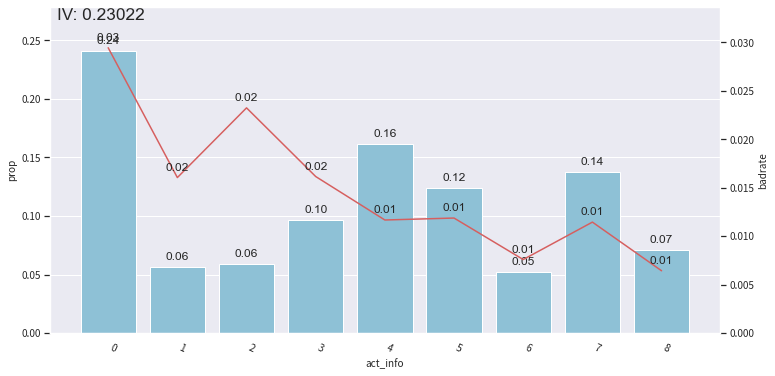

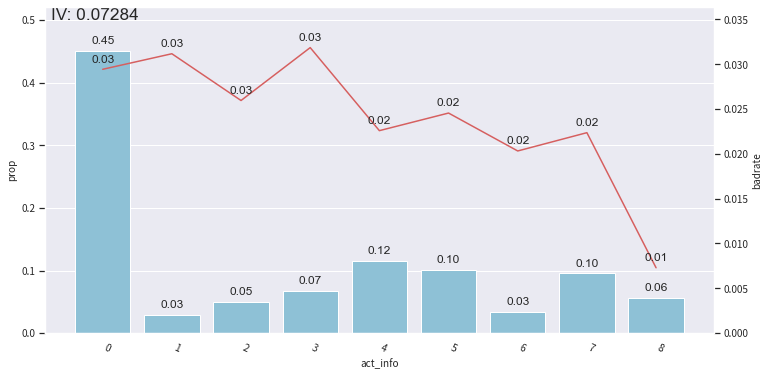

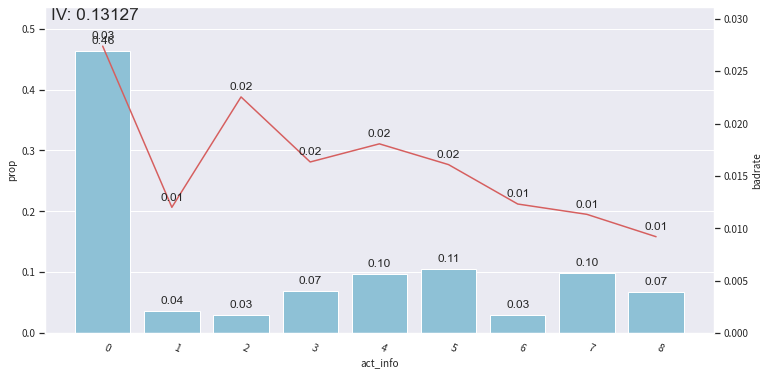

In [22]:
from toad.plot import bin_plot,badrate_plot 
bin_plot(dev_slct2,x='act_info',target='bad_ind')
bin_plot(val2,x='act_info',target='bad_ind')
bin_plot(off2,x='act_info',target='bad_ind')

In [23]:
bins['act_info']

[0.1153846153846154,
 0.141025641025641,
 0.1666666666666666,
 0.2051282051282051,
 0.2692307692307692,
 0.358974358974359,
 0.3974358974358974,
 0.5256410256410257]

In [24]:
adj_bin = {'act_info':[0.1666666666666666,0.358974358974359,]}
combiner.set_rules(adj_bin)

In [25]:
dev_slct3 = combiner.transform(dev_slct1)
val3 = combiner.transform(val[dev_slct1.columns])
off3 = combiner.transform(off[dev_slct1.columns])

<AxesSubplot:xlabel='act_info', ylabel='prop'>

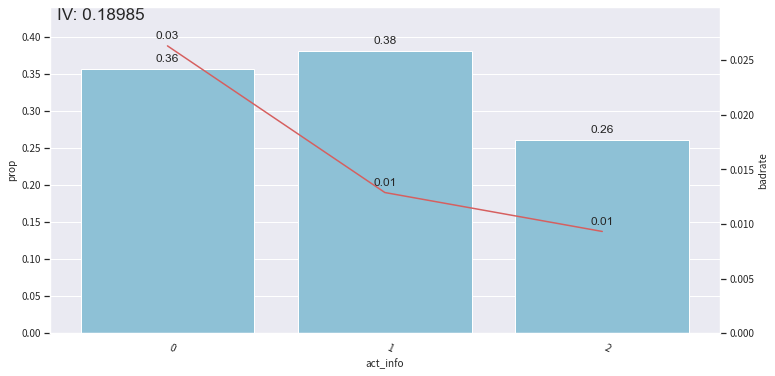

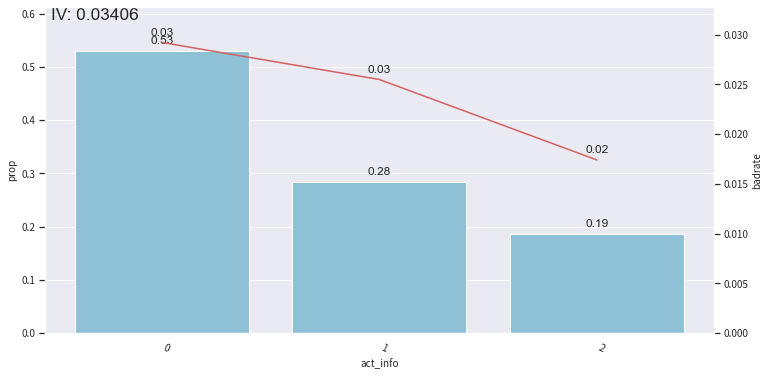

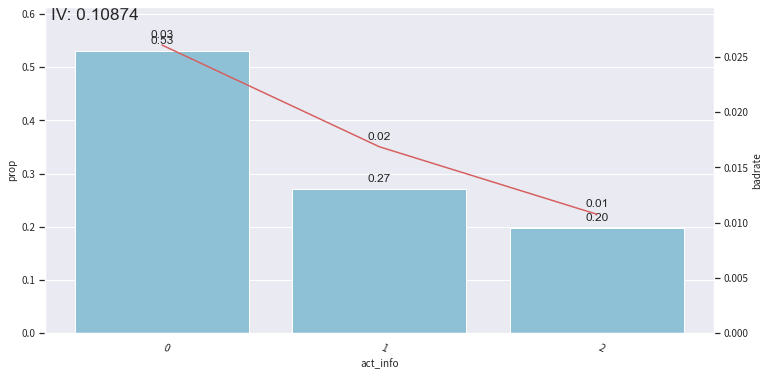

In [26]:
bin_plot(dev_slct3,x='act_info',target='bad_ind')
bin_plot(val3,x='act_info',target='bad_ind')
bin_plot(off3,x='act_info',target='bad_ind')

<AxesSubplot:xlabel='samp_type', ylabel='badrate'>

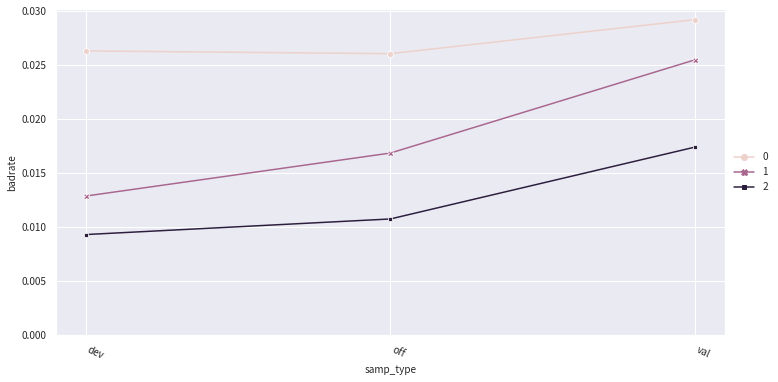

In [27]:
data = pd.concat([dev_slct3,val3,off3],join='inner')
badrate_plot(data,x='samp_type',target='bad_ind',by='act_info')

<AxesSubplot:xlabel='samp_type', ylabel='badrate'>

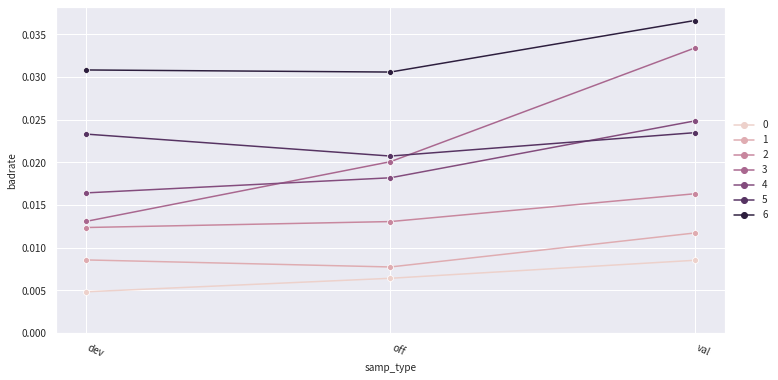

In [28]:
data = pd.concat([dev_slct3,val3,off3],join='inner')
badrate_plot(data,x='samp_type',target='bad_ind',by='person_info')

# WOE

In [30]:
t = toad.transform.WOETransformer()
dev_slct2_woe = t.fit_transform(dev_slct3,dev_slct3['bad_ind'],
                               exclude = ex_lis)
val_woe = t.transform(val3[dev_slct3.columns])
off_woe = t.transform(off3[dev_slct3.columns])
data=pd.concat([dev_slct2_woe,val_woe,off_woe])

In [31]:
psi_df = toad.metrics.PSI(dev_slct2_woe,val_woe).sort_values(0)
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns={'index':'feature',0:'psi'})
psi_013 = list(psi_df[psi_df.psi<0.13].feature)

In [32]:
for i in ex_lis:
    if i in psi_013:
        pass
    else:
        psi_013.append(i)

In [33]:
data = data[psi_013]
dev_woe_psi = dev_slct2_woe[psi_013]
val_woe_psi = val_woe[psi_013]
off_woe_psi = off_woe[psi_013]
print(data.shape)

(95806, 11)


In [34]:
dev_woe_psi2,drop_1st = toad.selection.select(dev_woe_psi,
                                             dev_woe_psi['bad_ind'],
                                              empty = 0.6,
                                              iv = 0.001,
                                              corr=0.5,
                                              return_drop=True,
                                              exclude = ex_lis 
                                             )
print("keep:",dev_woe_psi2.shape[1],
     "drop empty:",len(drop_1st['empty']),
      "drop iv:",len(drop_1st['iv']),
      "drop corr:",len(drop_1st['corr'])
     )

keep: 7 drop empty: 0 drop iv: 4 drop corr: 0


In [35]:
dev_woe_psi_stp = toad.selection.stepwise(dev_woe_psi2,
                                         dev_woe_psi2['bad_ind'],
                                         exclude=ex_lis,
                                         direction='both',
                                         criterion='aic',
                                         estimator='ols',
                                          intercept=False
                                         )
val_woe_psi_stp = val_woe_psi[dev_woe_psi_stp.columns]
off_woe_psi_stp = off_woe_psi[dev_woe_psi_stp.columns]
data = pd.concat([dev_woe_psi_stp,val_woe_psi_stp,off_woe_psi_stp])
print(data.shape)

(95806, 6)


# define functions 

In [36]:
#define logistic regression function

In [52]:
def lr_model(x,y,valx,valy,offx,offy,C):
    model = LogisticRegression(C=C,class_weight='balanced')
    model.fit(x,y)
    
    y_pred = model.predict_proba(x)[:,1]
    fpr_dev,tpr_dev,_ = roc_curve(y,y_pred)
    train_ks = abs(fpr_dev - tpr_dev).max()
    print('train_ks: ',train_ks)
    
    y_pred = model.predict_proba(valx)[:,1]
    fpr_val,tpr_val,_ = roc_curve(valy,y_pred)
    val_ks = abs(fpr_val - tpr_val).max()
    print('val_ks: ',val_ks)    
    
    y_pred = model.predict_proba(offx)[:,1]
    fpr_off,tpr_off,_ = roc_curve(offy,y_pred)
    off_ks = abs(fpr_off - tpr_off).max()
    print('off_ks: ',off_ks)
    
    from matplotlib import pyplot as plt 
    plt.plot(fpr_dev,tpr_dev,label='dev')
    plt.plot(fpr_val,tpr_val,label='val')
    plt.plot(fpr_off,tpr_off,label='off')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

In [38]:
#define XGBoost function 

In [53]:
def xgb_model(x,y,valx,valy,offx,offy):
    model = xgb.XGBClassifier(learning_rate = 0.05,
                              n_estimators =400,
                              max_depth = 2, 
                              class_weight = 'balanced', 
                              min_child_weight = 1, 
                              subsample = 1, 
                              nthread = -1, 
                              scale_pos_weight = 1, 
                              random_state = 1, 
                              n_jobs = -1, 
                              reg_lambda =300) 
    model.fit(x,y)
    
    y_pred = model.predict_proba(x)[:,1]
    fpr_dev,tpr_dev,_ = roc_curve(y,y_pred)
    train_ks = abs(fpr_dev - tpr_dev).max()
    print('train_ks: ',train_ks)
    
    y_pred = model.predict_proba(valx)[:,1]
    fpr_val,tpr_val,_ = roc_curve(valy,y_pred)
    val_ks = abs(fpr_val - tpr_val).max()
    print('val_ks: ',val_ks)    
    
    y_pred = model.predict_proba(offx)[:,1]
    fpr_off,tpr_off,_ = roc_curve(offy,y_pred)
    off_ks = abs(fpr_off - tpr_off).max()
    print('off_ks: ',off_ks)
    
    from matplotlib import pyplot as plt 
    plt.plot(fpr_dev,tpr_dev,label='dev')
    plt.plot(fpr_val,tpr_val,label='val')
    plt.plot(fpr_off,tpr_off,label='off')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show() 

In [40]:
#define function to call above functions 

In [54]:
def bi_train(data,dep='bad_ind',exclude = None):
    from sklearn.preprocessing import StandardScaler
    std_scaler = StandardScaler()
    #variables 
    lis = list(data.columns)
    for i in exclude: 
        lis.remove(i)
    data[lis] = std_scaler.fit_transform(data[lis])
    devv = data[(data['samp_type'] == 'dev')]
    vall = data[(data['samp_type'] == 'val')]
    offf = data[(data['samp_type'] == 'off')]
    x,y = devv[lis],devv[dep]
    valx,valy=vall[lis],vall[dep]
    offx,offy = offf[lis],offf[dep]
    
    #logistic forward
    print("logistic regression forward:")
    lr_model(x,y,valx,valy,offx,offy,0.1)
    #logsitc backward 
    print("logistic regression backward:")
    lr_model(offx,offy,valx,valy,x,y,0.1)
    #XGBoost forward 
    print("XGBoost forward:")
    xgb_model(x,y,valx,valy,offx,offy)
    #XGBoost backward
    print("XBGosst backward:")
    xgb_model(offx,offy,valx,valy,x,y)

logistic regression forward:
train_ks:  0.41733648227995124
val_ks:  0.3593935758405114
off_ks:  0.3758086175640308


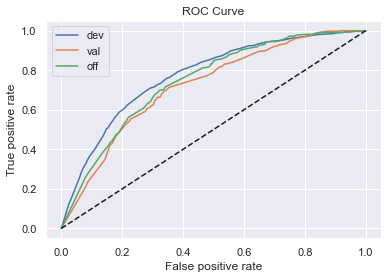

logistic regression backward:
train_ks:  0.3892612859630226
val_ks:  0.3717891855920369
off_ks:  0.4061965880072622


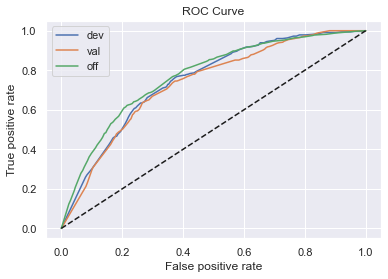

XGBoost forward:
[14:13:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:13:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train_ks:  0.42521927400747045
val_ks:  0.3595542266920359
off_ks:  0.37437103192850807


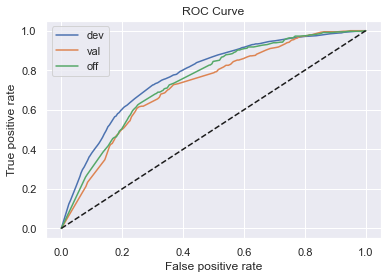

XBGosst backward:
[14:13:04] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:13:04] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_ks:  0.3939473708822855


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


val_ks:  0.3799497614606668
off_ks:  0.3936270948436908


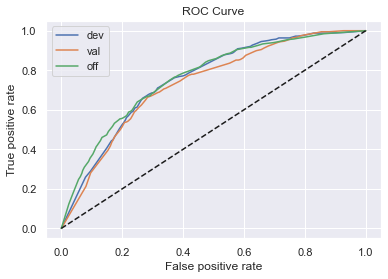

In [55]:
bi_train(data,dep='bad_ind',exclude=ex_lis)

In [57]:
#fitting Logistic regression models 

In [63]:
dep = 'bad_ind'
lis = list(data.columns)
for i in ex_lis:
    lis.remove(i)
devv = data[data['samp_type']=='dev']
vall = data[data['samp_type']=='val']
offf = data[data['samp_type']=='off']
x,y = devv[lis],devv[dep]
valx,valy = vall[lis],vall[dep]
offx,offy = offf[lis],offf[dep]
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

# check scores

In [64]:
#Computing F1, KS, and AUC

In [68]:
from toad.metrics import KS, F1, AUC

prob_dev = lr.predict_proba(x)[:,1]
print('training set')
print('F1:',F1(prob_dev,y))
print('KS:',KS(prob_dev,y))
print('AUC:',AUC(prob_dev,y))

prob_val = lr.predict_proba(valx)[:,1]
print('valuation set')
print('F1:',F1(prob_val,valy))
print('KS:',KS(prob_val,valy))
print('AUC:',AUC(prob_val,valy))

prob_off = lr.predict_proba(offx)[:,1]
print('off timeframe')
print('F1:',F1(prob_off,offy))
print('KS:',KS(prob_off,offy))
print('AUC:',AUC(prob_off,offy))

training set
F1: 0.02962459026532253
KS: 0.41406129833591426
AUC: 0.7713247123864264
valuation set
F1: 0.027689429373246022
KS: 0.36127808343721585
AUC: 0.7225727568398459
off timeframe
F1: 0.032454090150250414
KS: 0.3807135163445966
AUC: 0.7435613582904539


In [70]:
#computing PSI for model and features 

In [72]:
print('model PSI:',toad.metrics.PSI(prob_dev,prob_off))
print('feature PSI:','\n',toad.metrics.PSI(x,offx).sort_values(0))

model PSI: 0.34091667386100255
feature PSI: 
 credit_info    0.098585
act_info       0.124820
person_info    0.127833
dtype: float64


In [73]:
#genearte KS report for off time frame 

In [74]:
toad.metrics.KS_bucket(prob_off,offy,
                      bucket=10,
                      method='quantile')

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift
0,0.001870,0.003791,3.0,1256.0,1259.0,0.002383,0.997617,0.002389,0.009146,0.080271,...,0.002383,0.020532,0.009146,1.000000,0.080271,1.000000,0.078811,1.000000,0.071125,1.000000
1,0.003968,0.005382,3.0,1554.0,1557.0,0.001927,0.998073,0.001931,0.009146,0.099316,...,0.002131,0.022085,0.018293,0.990854,0.179587,0.919729,0.176275,0.921189,0.161294,1.075624
2,0.006361,0.008708,10.0,1840.0,1850.0,0.005405,0.994595,0.005435,0.030488,0.117594,...,0.003429,0.024470,0.048780,0.981707,0.297182,0.820413,0.292081,0.823725,0.248401,1.191791
3,0.008728,0.010891,12.0,1258.0,1270.0,0.009449,0.990551,0.009539,0.036585,0.080399,...,0.004717,0.027589,0.085366,0.951220,0.377580,0.702818,0.371581,0.707919,0.292215,1.343685
4,0.011006,0.017980,27.0,2004.0,2031.0,0.013294,0.986706,0.013473,0.082317,0.128076,...,0.006903,0.029883,0.167683,0.914634,0.505656,0.622420,0.498717,0.628419,0.337973,1.455452
5,0.018032,0.018032,0.0,41.0,41.0,0.000000,1.000000,0.000000,0.000000,0.002620,...,0.006868,0.034091,0.167683,0.832317,0.508276,0.494344,0.501283,0.501283,0.340593,1.660373
6,0.018379,0.029245,62.0,3101.0,3163.0,0.019602,0.980398,0.019994,0.189024,0.198185,...,0.010474,0.034266,0.356707,0.832317,0.706461,0.491724,0.699280,0.498717,0.349754,1.668917
7,0.029886,0.037582,41.0,1435.0,1476.0,0.027778,0.972222,0.028571,0.125000,0.091711,...,0.012493,0.043922,0.481707,0.643293,0.798172,0.293539,0.791674,0.300720,0.316465,2.139176
8,0.037968,0.058339,43.0,1007.0,1050.0,0.040952,0.959048,0.042701,0.131098,0.064357,...,0.014675,0.051082,0.612805,0.518293,0.862530,0.201828,0.857402,0.208326,0.249725,2.487898
9,0.062269,0.094398,127.0,2151.0,2278.0,0.055751,0.944249,0.059042,0.387195,0.137470,...,0.020532,0.055751,1.000000,0.387195,1.000000,0.137470,1.000000,0.142598,-0.000000,2.715295


# Making ScoreCard 

In [82]:
from toad.scorecard import ScoreCard
card = ScoreCard(combiner = combiner,
                transer=t, C=0.1,
                 class_weight='balanced',
                 base_score = 600, 
                 base_odds = 35, 
                 pdo = 60, 
                 rate = 2 
                )
card.fit(x,y)
final_card = card.export(to_frame = True)
final_card

,name,value,score
0,credit_info,[-inf ~ 0.02),158.04
1,credit_info,[0.02 ~ 0.04),122.51
2,credit_info,[0.04 ~ 0.11),73.94
3,credit_info,[0.11 ~ inf),43.98
4,act_info,[-inf ~ 0.1666666666666666),94.24
5,act_info,[0.1666666666666666 ~ 0.358974358974359),115.71
6,act_info,[0.358974358974359 ~ inf),125.38
7,person_info,[-inf ~ -0.2610139784946237),172.76
8,person_info,[-0.2610139784946237 ~ -0.1286774193548387),142.93
9,person_info,[-0.1286774193548387 ~ -0.0537175627240143),123.74
